In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### Customer Segmentation (Using K-Means Clustering) Project

In [9]:
def inspect_dataset(data:pd.DataFrame)->None:
    # Inspect what the dataset looks like
    print("Data head:\n",data.head(),'\n')
    print("Data shape:\n",data.shape,"\n\nData info:")
    print("\n",data.info(),"\n")

    # Check for missing values
    print("Null values:\n",data.isnull().sum(),'\n')

    # statistical measures about the data
    print("Statistics:\n",data.describe(),'\n')
    print("===========================================================================================")
    return


In [21]:
def k_means_clustering(data:pd.DataFrame)->tuple[pd.DataFrame,tuple[float]]:
    # finding wcss value for different number of clusters
    # wcss = within clusters sum of squares
    X = data.iloc[:,[3,4]].values
    wcss = []
    for i in range(1,11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X)

        wcss.append(kmeans.inertia_)
    return X, wcss

In [16]:
def elbow_graph(wcss:tuple[float])->None:
    sns.set()
    plt.plot(range(1,11), wcss)
    plt.title('The Elbow Point Graph')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()
    return

In [31]:
def myModel(X:pd.DataFrame)->np.array:
    kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
    # return a label for each data point based on their cluster
    Y = kmeans.fit_predict(X)
    print(type(Y))
    return Y

In [42]:
def visualize_Clusters(X:pd.DataFrame, Y:np.array)->None:
    plt.figure(figsize=(8,8))
    plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
    plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
    plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
    plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
    plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

    # plot the centroids
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

    plt.title('Customer Groups')
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.show()
    return

In [43]:
def main()->None:
    customer_data = pd.read_csv('Mall_Customers.csv')
    inspect_dataset(customer_data)
    X, wcss = k_means_clustering(customer_data)
    elbow_graph(wcss)
    Y = myModel(X)
    visualize_Clusters(X,Y)
    return

Data head:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40 

Data shape:
 (200, 5) 

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

 None 

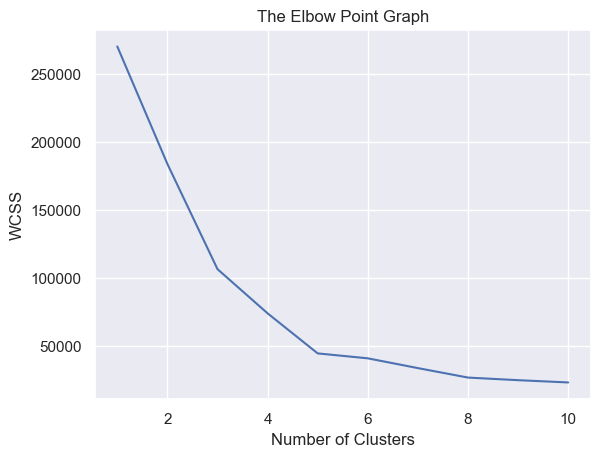

<class 'numpy.ndarray'>


NameError: name 'kmeans' is not defined

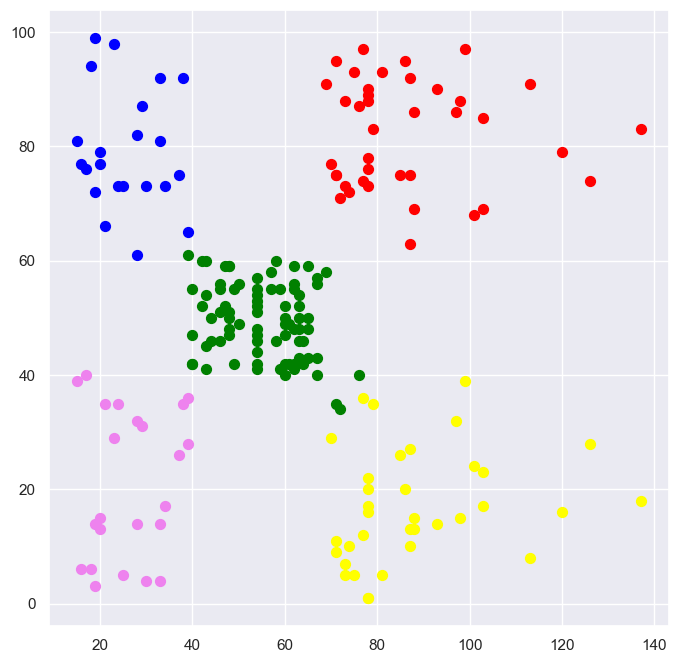

In [44]:
if __name__=='__main__':
    main()